# Eigendecomposition

$$
\begin{aligned}
Av &= \lambda v \\
Av - \lambda v &= 0 \\
( A - \lambda I ) v &= 0 \\
Bv &= 0
\end{aligned}
$$
has nontrivial null space. That means:
$$ |A - \lambda I| = 0 $$


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#matrix
A = [[1, 5], [2, 4]]

#extract the eigenvalues
eigvals = np.linalg.eig(A)

#note that the eigenvalues are in the first element of eignvals:
print(f"Eigenvalues: \n {eigvals}")

Eigenvalues: 
 EigResult(eigenvalues=array([-1.,  6.]), eigenvectors=array([[-0.92847669, -0.70710678],
       [ 0.37139068, -0.70710678]]))


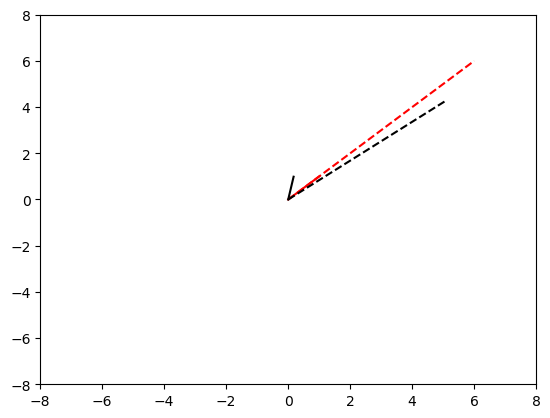

In [30]:
#specify two vectors
v1 = np.array([1, 1]) #is an eigenvector!
v2 = np.random.randn(2)  # agora shape (2,) #unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2) #unit length for convenience

#compute Av
Av1 = A@v1
Av2 = A@v2

#plot the vectors and Av
plt.plot([0, v1[0]], [0, v1[1]], 'r')
plt.plot([0, Av1[0]], [0, Av1[1]], 'r--')
plt.plot([0, v2[0]], [0, v2[1]], 'k')
plt.plot([0, Av2[0]], [0, Av2[1]], 'k--')

plt.axis([-8, 8, -8, 8])
plt.show()

In [32]:
#confirm eigenvalues for a 3x3 matrix
# specify matrix
A = [[-2, 2, -3],
    [-4, 1, -6],
    [-1, -2, 0]]

#get eigenvalues
evals = np.linalg.eig(A)
print(f"Evals: \n {evals}")

Evals: 
 EigResult(eigenvalues=array([-3., -1.,  3.]), eigenvectors=array([[-1.82827776e-16,  5.77350269e-01, -5.77350269e-01],
       [ 8.32050294e-01, -5.77350269e-01, -5.77350269e-01],
       [ 5.54700196e-01, -5.77350269e-01,  5.77350269e-01]]))


## Shortcut

$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

$$ \lambda^2 - (a+d)\lambda + (ad-bc) = 0 $$

a+d = trace  
ad-bc = determinant


### challenge

In [52]:
#generate diagonal matrix (2x2), compute its eigenvalues
A = np.diag([2, 1])
print(f"Matrix A: \n {A}"), print(' ')
print(f"Eigenvalues of A: \n {np.linalg.eig(A)[0]}"), print(' ')

#expand this to NxN diagonal matrices
A = np.diag(np.arange(3, 18))
print(f"Matrix A: \n {A}"), print(' ')
print(f"Eigenvalues of A: \n {np.linalg.eig(A)[0]}"), print(' ')

#triangular matrices (lower, upper)


Matrix A: 
 [[2 0]
 [0 1]]
 
Eigenvalues of A: 
 [2. 1.]
 
Matrix A: 
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
 
Eigenvalues of A: 
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 


(None, None)

In [54]:
#repeat with triangular (lower/ upper)
A = np.triu(np.random.randn(4,4)) #upper / 'tril' - lower

print(f"Matrix A: \n {A}"), print(' ')
print(f"Eigenvalues of A: \n {np.linalg.eig(A)[0]}"), print(' ')

Matrix A: 
 [[-0.82402528  0.78574664 -1.59588778  1.56333029]
 [ 0.          1.35061767  0.09800476 -0.37855489]
 [ 0.          0.         -1.11190425 -0.81298544]
 [ 0.          0.          0.          0.08069929]]
 
Eigenvalues of A: 
 [-0.82402528  1.35061767 -1.11190425  0.08069929]
 


(None, None)

### challenge 2

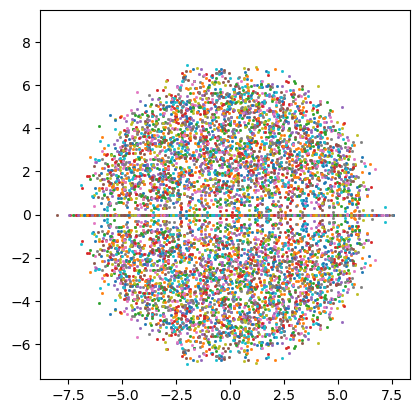

In [57]:
#generate 'large' random matrices, extrat eigenvalues, plot

#repeat this lots of times for a lots of random matrices, put all the eigenvalues in the same plot 

for i in range(200):
    A = np.random.randn(40,40)
    evals = np.linalg.eig(A)[0]
    plt.plot(np.real(evals), np.imag(evals), 's', markersize = 1)


plt. axis('square')
plt.show()

## Finding Eigenvectors

In [68]:
#matrix
A = [[1, 2], [2, 1]]

#extract the eigenvalues
eigvals, evecs = np.linalg.eig(A)

print(f"Eigenvalues of A: \n {eigvals}"), print(' ')
print(f"Eigenvectos of A: \n {evecs}")

Eigenvalues of A: 
 [ 3. -1.]
 
Eigenvectos of A: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


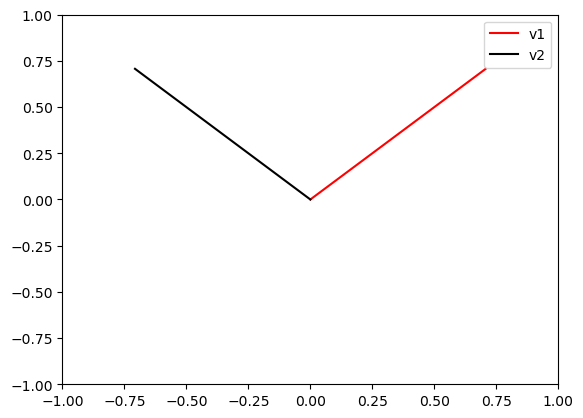

In [74]:
#compute the norm of each eigenvector
mag_v1 = np.sqrt(np.sum(np.square(evecs[:, 0])))
mag_v2 = np.sqrt(np.sum(np.square(evecs[:, 1])))
print(mag_v1, mag_v2)

#plot 
plt.plot([0, evecs[0,0]], [0, evecs[1,0]], 'r', label='v1')
plt.plot([0, evecs[0,1]], [0, evecs[1,1]], 'k', label='v2')

plt.axis([-1, 1, -1 , 1])
plt.legend()
plt.show()